In [1]:
from src.lstm_ad import LSTM_AD

import torch
import src
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
use_cuda = torch.cuda.is_available()
if use_cuda:
    print('__CUDNN VERSION:', torch.backends.cudnn.version())
    print('__Number CUDA Devices:', torch.cuda.device_count())
    print('__CUDA Device Name:',torch.cuda.get_device_name(0))
    print('__CUDA Device Total Memory [GB]:',torch.cuda.get_device_properties(0).total_memory/1e9)
device = torch.device("cuda" if use_cuda else "cpu")
print("Device: ", device)

__CUDNN VERSION: 7605
__Number CUDA Devices: 1
__CUDA Device Name: GeForce GTX 1060
__CUDA Device Total Memory [GB]: 6.373572608
Device:  cuda


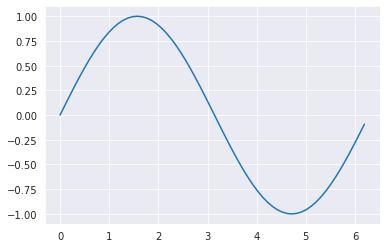

In [3]:
t = np.linspace(0, 32*np.pi, 1024)
x = np.sin(t)
plt.plot(t[:64], x[:64]);

In [4]:
from src.utils import data

window = 64
params = {
    'batch_size': 10,
    'shuffle': False#True
}
train_loader = data.create_data_loader(
    x=torch.tensor(x),
    window=window,
    model_type="LSTM",
    device=device,
    anomalies=torch.zeros(len(x)),
    **params
)

In [5]:
epochs = 10
model = LSTM_AD(
    window_size=window,
    hidden_size1=20,
    hidden_size2=20,
    device=device
)
model.train(train_loader=train_loader, validation_loader=None,
            data_storage="records", epochs=epochs, model_name="LSTM-AD",
            logdir="logs", verbose=1)

Epoch 0, dataset train: Loss - 0.370933, MSE - 0.370933
Epoch 1, dataset train: Loss - 0.032439, MSE - 0.032439
Epoch 2, dataset train: Loss - 0.001603, MSE - 0.001603
Epoch 3, dataset train: Loss - 0.001042, MSE - 0.001042
Epoch 4, dataset train: Loss - 0.000706, MSE - 0.000706
Epoch 5, dataset train: Loss - 0.000522, MSE - 0.000522
Epoch 6, dataset train: Loss - 0.000452, MSE - 0.000452
Epoch 7, dataset train: Loss - 0.000387, MSE - 0.000387
Epoch 8, dataset train: Loss - 0.000342, MSE - 0.000342
Epoch 9, dataset train: Loss - 0.000276, MSE - 0.000276


In [6]:
loss_sum = 0
y_preds = None
for tmp_x, tmp_y, tmp_anomalies in train_loader:
    y_pred = model(tmp_x)[:, 0].cpu().detach().numpy()
    if y_preds is None:
        y_preds = y_pred
    else:
        y_preds = np.concatenate([y_preds, y_pred])

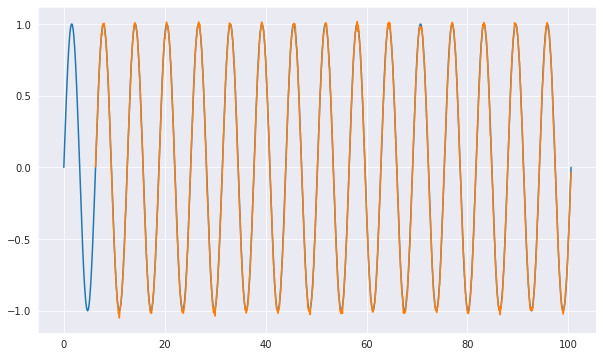

In [7]:
t = np.linspace(0, 32*np.pi, 1024)
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(t, np.sin(t))
ax.plot(t[window:len(y_preds)+window], y_preds);